<a href="https://www.kaggle.com/code/kuroinuhakuryu/base-line-3-1?scriptVersionId=121029272" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Решение задачи регрессии с помощью нейронных сетей

Определение стоимости недвижимости из набора данных [California Housing Data Set](https://developers.google.com/machine-learning/crash-course/california-housing-data-description).

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://openedu.ru/course/urfu/PYDNN/)".

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
""" посмотрим, какие файлы храняться в директории """
import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dl-urfu-regression/sample_submission.csv
/kaggle/input/dl-urfu-regression/train.csv
/kaggle/input/dl-urfu-regression/test.csv


## Загружаем данные

In [3]:
train_df = pd.read_csv('/kaggle/input/dl-urfu-regression/train.csv')
test_df = pd.read_csv('/kaggle/input/dl-urfu-regression/test.csv')
sample_submission = pd.read_csv('/kaggle/input/dl-urfu-regression/sample_submission.csv', index_col='id')

**Описание данных**

California Housing содержит данные о средней стоимость домов в Калифорнии для квартала. Файл с данными содержит следующие столбцы:

*   **longitude** - долгота квартала с недвижимостью.
*   **latitude** - широта квартала с недвижимостью.
*   **housing_median_age** - медиана возраста домов в квартале.
*   **total_rooms** - общее колиичество комнат в квартале.
*   **total_bedrooms** - общее количество спален в квартале.
*   **population** - население квартала.
*   **households** - количество "домохозяйств" в квартале (групп людей живущих вместе в одном доме. Как правило это семьи).
*   **median_income** - медианный доход в квартале.
*   **median_house_value** - медианная стоимость дома в квартале.



In [4]:
"""Смотрим на случайные 3 записи в нашем тренировочном наборе"""
train_df.sample(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1552,-122.33,40.48,26.0,695.0,126.0,319.0,124.0,3.2788,101600.0
8969,-118.93,36.19,30.0,2685.0,546.0,951.0,523.0,2.6184,113900.0
13480,-118.50,34.26,33.0,2831.0,510.0,1340.0,504.0,4.8316,237300.0


In [5]:
"""Смотрим на случайные 3 записи в нашем тестовом наборе"""
test_df.sample(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
344,-117.42,34.13,4.0,11587.0,1796.0,5804.0,1705.0,4.8283
2681,-118.46,34.03,52.0,523.0,124.0,317.0,130.0,2.2794
2553,-118.21,33.89,42.0,1739.0,370.0,1104.0,297.0,2.2125


In [6]:
"""Смотрим на случайные 3 записи в шаблоне для ответов"""
sample_submission.sample(3)

,median_house_value
id,
849,0.8490
2206,0.2206
218,0.2180


## Постановка задачи регрессии

Необходимо определить медианную стоимость дома в квартале, зная все остальные признаки.

**Целевая переменная**: `median_house_value`

**Признаки**: `longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households,	median_income`

Признаки подаются на вход нейронной сети, на выходе сеть должна выдать значение целевой переменной - `median_house_value`

In [7]:
"""Выделяем данные для обучения и преобразуем их в массивы numpy.
Функция pop() возвращает нам указанный столбец и одновременно удаляет его из таблицы.
Таким образом, когда мы присваиваем df_train в переменную x_train,
там уже нет столбца с метками правильных ответов median_house_value """
y_train = train_df.pop('median_house_value').values
x_train = train_df.values
x_test = test_df.values

In [8]:
"""Убедимся, что количество столбцов в данных совпадает"""
x_train.shape, x_test.shape

((17000, 8), (3000, 8))

**Стандартизация данных**

Вычитаем среднее значение и делим на стандартное отклонение

In [9]:
# Среднее значение
mean = x_train.mean(axis=0)
# Стандартное отклонение
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std

## Создаем нейронную сеть

Выходной слой с одним линейным нейроном - для задачи регрессии функция активации - RELU.

In [76]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))

In [77]:
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 256)               2304      
_________________________________________________________________
dense_58 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_59 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_60 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_61 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 17        
Total params: 46,081
Trainable params: 46,081
Non-trainable params: 0
_________________________________________________

**Компилируем сеть**

Функция ошибки - среднеквадратичное отклонение. Метрика - среднее абсолютное отклонение.

In [78]:
model.compile(optimizer='adam', loss='mape', metrics=['mae'])

## Обучаем нейронную сеть

In [79]:
history = model.fit(x_train, 
                    y_train,
                    batch_size=50,
                    epochs=300, 
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/300
306/306 - 2s - loss: 69.5585 - mae: 151562.9531 - val_loss: 41.8883 - val_mae: 99196.2109
Epoch 2/300
306/306 - 0s - loss: 31.5101 - mae: 67468.8594 - val_loss: 24.9877 - val_mae: 53828.2031
Epoch 3/300
306/306 - 0s - loss: 24.7794 - mae: 52159.9023 - val_loss: 23.0813 - val_mae: 50746.9805
Epoch 4/300
306/306 - 0s - loss: 23.5810 - mae: 49555.7930 - val_loss: 22.5270 - val_mae: 48762.9570
Epoch 5/300
306/306 - 0s - loss: 23.1452 - mae: 48514.6641 - val_loss: 22.1906 - val_mae: 47700.9688
Epoch 6/300
306/306 - 0s - loss: 22.8545 - mae: 47833.6680 - val_loss: 22.1478 - val_mae: 46634.9805
Epoch 7/300
306/306 - 0s - loss: 22.6054 - mae: 47276.6758 - val_loss: 21.9275 - val_mae: 47733.6406
Epoch 8/300
306/306 - 0s - loss: 22.4624 - mae: 47051.9727 - val_loss: 21.8951 - val_mae: 47432.2070
Epoch 9/300
306/306 - 0s - loss: 22.3271 - mae: 46788.3320 - val_loss: 21.7371 - val_mae: 46582.3672
Epoch 10/300
306/306 - 0s - loss: 22.1684 - mae: 46478.8086 - val_loss: 21.5523 - val_mae:

## Визуализация качества обучения

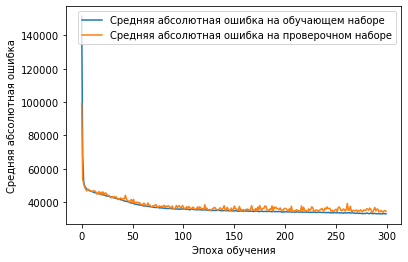

In [80]:
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

## Готовим данные для теста на liderboard

Делаем предсказания на тестовом наборе данных

In [81]:
"""делаем предсказания по всем тестовым данным"""
predictions = model.predict(x_test)
predictions

array([[ 50243.207],
       [ 56076.11 ],
       [ 63348.637],
       ...,
       [293603.94 ],
       [ 55476.992],
       [ 87792.78 ]], dtype=float32)

Пишем результаты предсказаний в шаблон "sample_submission"

In [82]:
"""используем файл с правильным шаблоном формата записи ответов и пишем в него наши предсказания"""
sample_submission['median_house_value'] = predictions

Записываем ответы для проверки на liderboard

In [83]:
"""to_csv - пишет табличные данные в файл '.csv' """
sample_submission.to_csv('sample_submission.csv')